# Group Project Proposal


## Introduction:

As students, balancing our life outside of school can be challenging. With the many distractions around us, it can be hard to determine how much time we should spend in our leisure, versus time spent on school. In this project, we will be attempting to discover the relationship between time spent on various distractions (in this case time spent with friends, and alcohol consumption on the weekdays and weekends) and the grades received in school.

The dataset we will be using for this analysis details student performance from two Portugeuse secondary schools. Each row represents an observation of a single student, with the grades they received from each period (G1, G2, G3) along with various details of their life, such as  how much free time they have, whether they are in a romantic relationship etc. We will be using the columns "goout" (time spent going out with friends), "Dalc" (workday alcohol consumption), and "Walc" (weekend alcohol consumption) as our predictors in order to discover the relationship between these distractions outside of school and the grade the student received.

# Load Relevant Libraries

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
set.seed(1000)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# Dataset Description by the Authors 

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.



# Data Collection

idea from: https://stackoverflow.com/questions/3053833/using-r-to-download-zipped-data-file-extract-and-import-data
data from: https://archive.ics.uci.edu/ml/machine-learning-databases/00320/


In [3]:
#make a temporary file 
tempfile <- tempfile()

#download file into temp 
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip", 
              tempfile) 

#extract relevant files 
student_mat <- read.table(unz(tempfile, "student-mat.csv"), 
                          header = TRUE, 
                          sep = ";")
student_por <- read.table(unz(tempfile, "student-por.csv"), 
                          header = TRUE, 
                          sep = ";")
unlink(tempfile)

#read files to see



In [4]:
#Combining the data done by the authors

combined <- merge(student_mat,
                  student_por,
                  by = c("school",
                        "sex",
                        "age",
                        "address",
                        "famsize",
                        "Pstatus",
                        "Medu",
                        "Fedu",
                        "Mjob",
                        "Fjob",
                        "reason",
                        "nursery",
                        "internet"))

print(nrow(combined)) # 382 students

[1] 382


## Tidying the data/Splitting into training and testing sets
To tidy the data we will need to merge both datasets into one combined set, we do this in the following cell. 
We also filter to just have the columns that we are interested in for our analysis.

Finally we split our dataset into a training and testing set.

In [5]:
total_set <- rbind(student_mat, student_por) 
filtered_set <- total_set %>% 
                select(goout, Dalc, Walc, G3)

data_split <- initial_split(filtered_set, prop = 0.75, strata = G3)  
data_train <- training(data_split)   
data_test <- testing(data_split)
data_train

,goout,Dalc,Walc,G3
,<int>,<int>,<int>,<int>
1,4,1,1,6
2,3,1,1,6
4,2,1,1,15
5,2,1,2,10
7,4,1,1,11
8,4,1,1,6
11,3,1,2,9
12,2,1,1,12
13,3,1,3,14


## Summarizing data in a table

In the following cell we find the mean of our predictor variables goout, Dalc, Walc

In [6]:
predictor_means <- data_train %>%
                   select(goout, Dalc, Walc) %>%
                   map_df(mean)
predictor_means

goout,Dalc,Walc
<dbl>,<dbl>,<dbl>
3.173248,1.48535,2.28535


We can see that on average more people go out with their friends versus drinking alcohol on the weekdays or weekends. It will be interesting to see if this variable has a greater effect on students' grades versus alcohol consumption.

## Visualization: 
In the following cells we provide plots that display the count of how many people got good grades (G3 >= 15) for each predictor variable

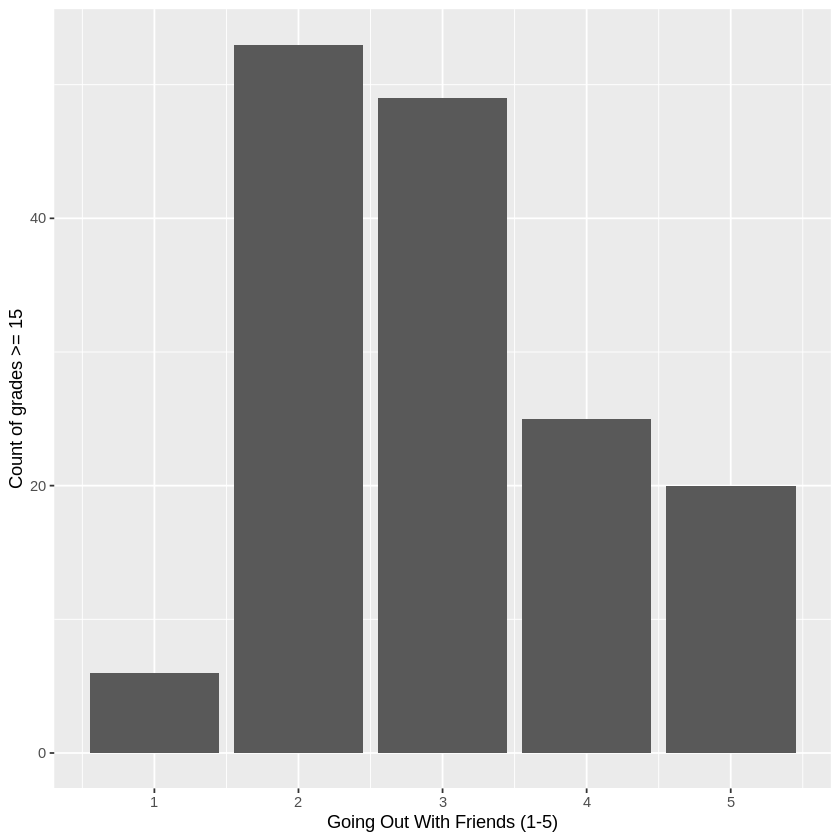

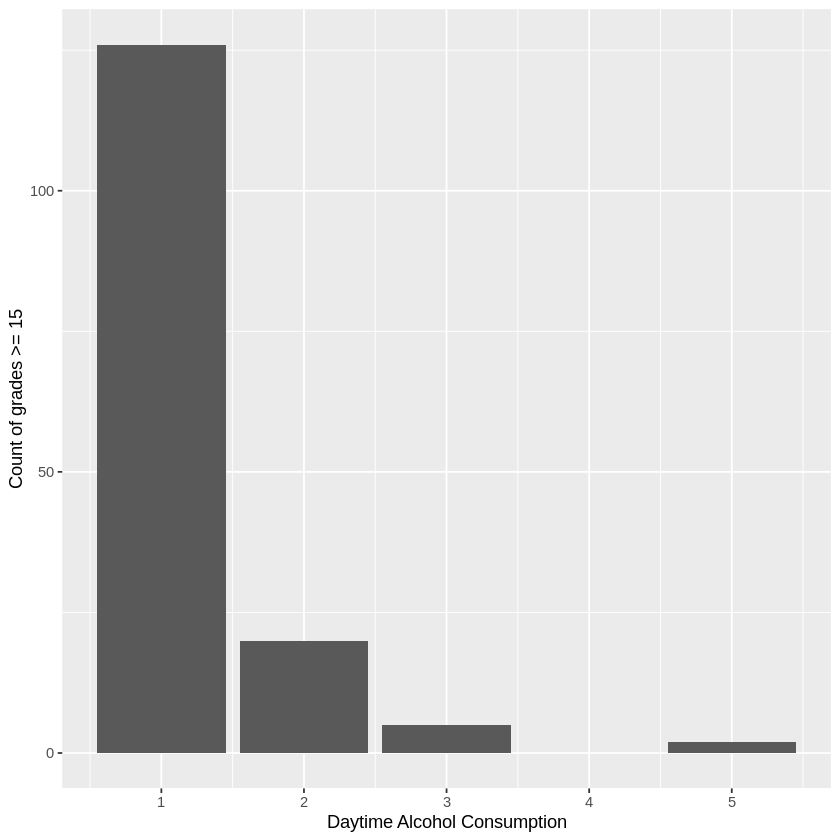

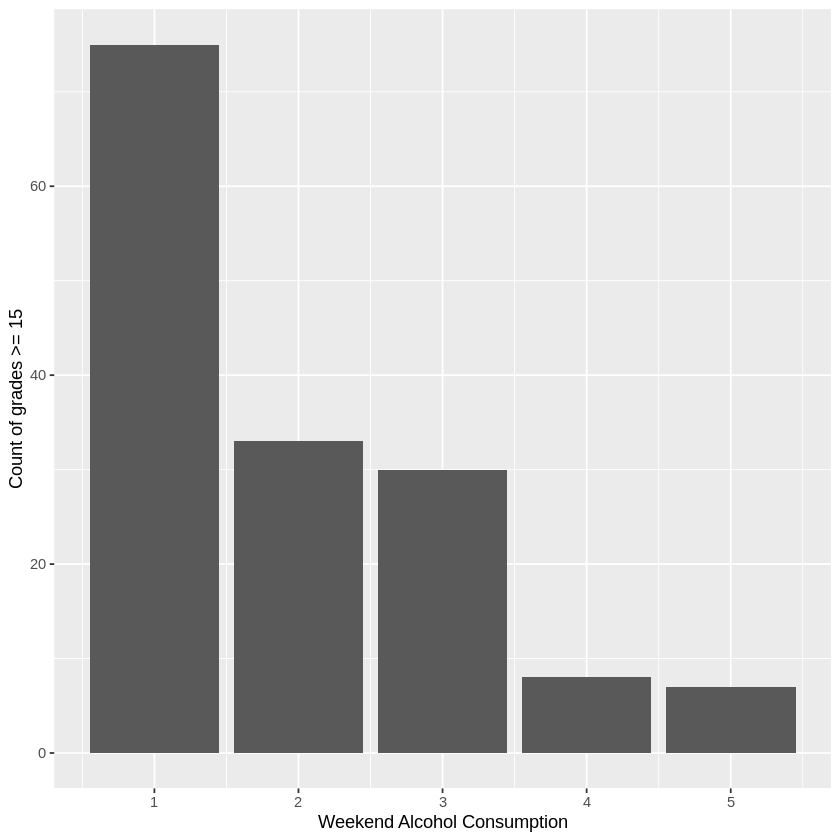

In [46]:
goout_viz <- data_train %>%
             filter(G3 >= 15) %>%
             ggplot(aes(x = goout)) +
             geom_bar() +
             xlab("Going Out With Friends (1-5)") +
             ylab("Count of grades >= 15")
dalc_viz <- data_train %>%
            filter(G3 >= 15) %>%
             ggplot(aes(x = Dalc)) +
             geom_bar() +
             xlab("Daytime Alcohol Consumption") +
             ylab("Count of grades >= 15")
walc_viz <- data_train %>%
            filter(G3 >= 15) %>%
             ggplot(aes(x = Walc)) +
             geom_bar() +
             xlab("Weekend Alcohol Consumption") +
             ylab("Count of grades >= 15")
goout_viz
dalc_viz
walc_viz

We can see that there is a clear trend with alcohol consumption - students who drink more alcohol tend to not get good grades. However, the trend is not as clear with the "going out with friends" variable. 